In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium as g
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 차트 -가 표시 안되는 문제 해결
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# warnings 무시
import warnings
warnings.filterwarnings(action='ignore') 

# barplot() 
>카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 차트

>평균은 막대의 높이, 편차 에러바

In [3]:
# 데이터 불러오기
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


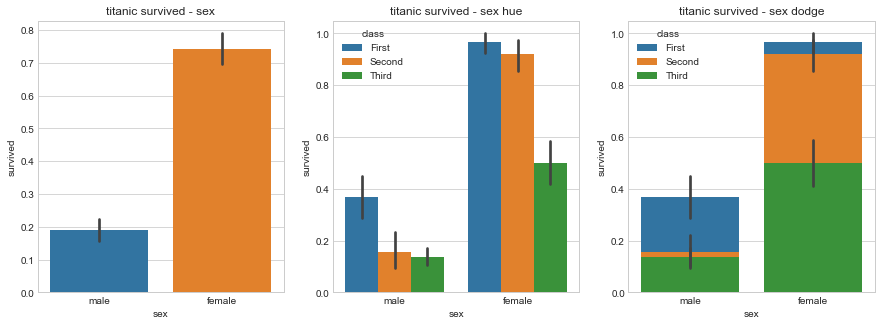

In [8]:
# barplot

# 스타일 테마를 설정 5가지 (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체를 생성하기 위한 피겨객체 얻어오기
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,3,1)
area01.set_title('titanic survived - sex')
area02 = fig.add_subplot(1,3,2)
area02.set_title('titanic survived - sex hue')
area03 = fig.add_subplot(1,3,3)
area03.set_title('titanic survived - sex dodge')

# 성별에 따른 생존률
sns.barplot(x = 'sex', y = 'survived', data=titanic, ax=area01)
# hue = 
sns.barplot(x = 'sex', y = 'survived', hue='class', data=titanic, ax=area02)
# dodge 
sns.barplot(x = 'sex', y = 'survived', hue='class', dodge=False, data=titanic, ax=area03)

plt.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


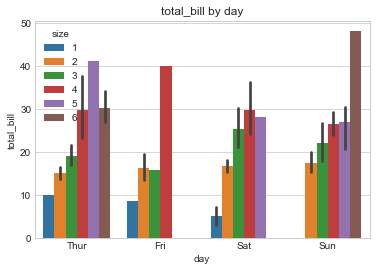

In [16]:
# tips barplot()
# 요일별 전체 팁을 시각화
display(tips.head())
sns.barplot(x = 'day', y = 'total_bill',  hue='size', data=tips)
plt.title('total_bill by day')
plt.show()

# countplot()
>카테고리 값 별로 데이터 빈도를 표시하는 차트

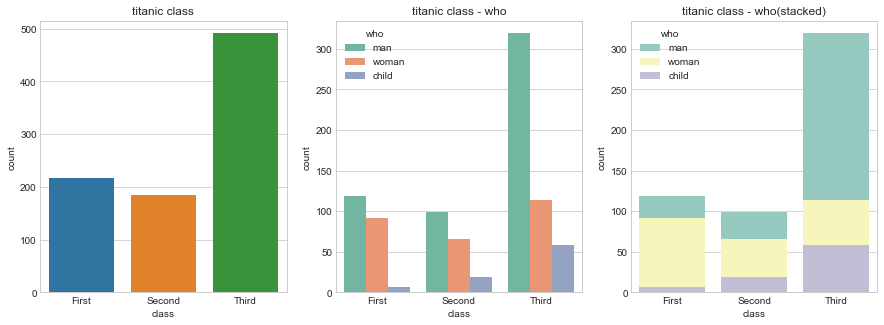

In [22]:
# countplot

# 스타일 테마를 설정 5가지 (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체를 생성하기 위한 피겨객체 얻어오기
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,3,1)
area01.set_title('titanic class')
area02 = fig.add_subplot(1,3,2)
area02.set_title('titanic class - who')
area03 = fig.add_subplot(1,3,3)
area03.set_title('titanic class - who(stacked)')

# 기본
sns.countplot(x = 'class', data=titanic, ax=area01)
# hue = 
sns.countplot(x = 'class', hue='who', palette='Set2', data=titanic, ax=area02)
# dodge 
sns.countplot(x = 'class', hue='who', dodge=False, palette='Set3', data=titanic, ax=area03)

plt.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


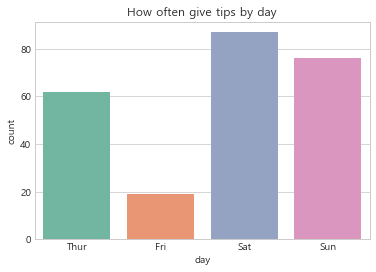

In [29]:
# tips 를 이용한 countplot()
# 요일 별로 팁을 준 빈도를 시각화

display(tips.head())
sns.countplot(x = 'day', palette='Set2', data=tips)
plt.title('How often give tips by day')
plt.show()

# stripplot() 
>scatterplot 처럼 모든 데이터를 점으로 시각화

>jitter=Trure 설정하면 위치를 무작위로 바꿔서 겹치지 않게 해준다.

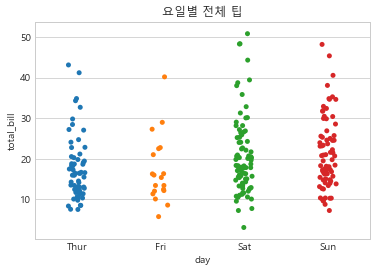

In [32]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
plt.title('요일별 전체 팁')
plt.show()

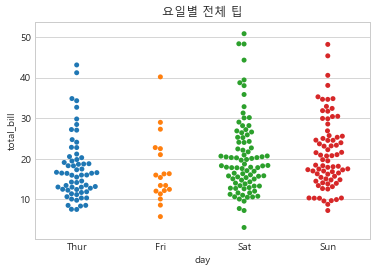

In [33]:
sns.swarmplot(x='day', y='total_bill', data=tips)
plt.title('요일별 전체 팁')
plt.show()

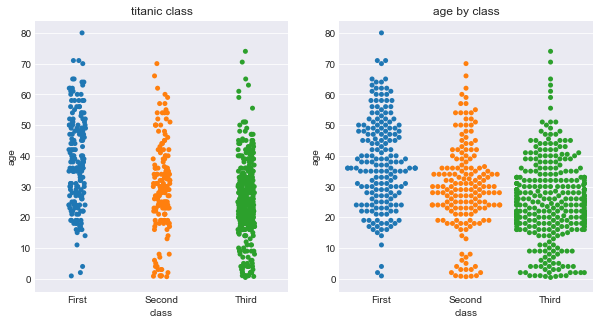

In [37]:
# 타이타닉 데이터를 이용하여 subplot 2개 영역으로 만들고
# class 별 나이의 분포를 확인(stripplot(), swarmplot())
sns.set_style('darkgrid')

fig = plt.figure(figsize=(10,5))

areaLeft = fig.add_subplot(1,2,1)
areaLeft.set_title('titanic class')
areaRight = fig.add_subplot(1,2,2)
areaRight.set_title('titanic class')

sns.stripplot(x='class', y='age', data=titanic,  ax=areaLeft, jitter=True)
plt.title('age by class')

sns.swarmplot(x='class', y='age',  ax=areaRight, data=titanic)
plt.title('age by class')
plt.show()

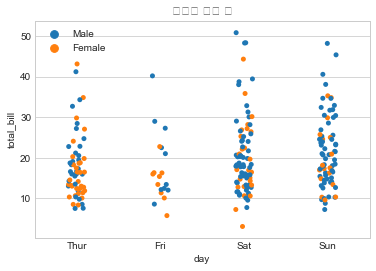

In [45]:
# tips에서 요일별, 성별 전체 팁 stripplot() 시각화
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips, jitter=True)
plt.title('요일별 전체 팁')
plt.legend(loc='best')
plt.show()

# boxplot(), violinplot()

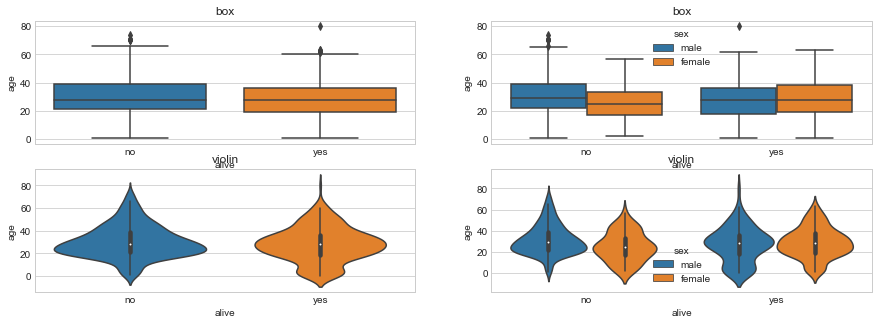

In [43]:
# 스타일 테마를 설정 5가지 (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체를 생성하기 위한 피겨객체 얻어오기
fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(2,2,1)
ax01.set_title('box')
ax02 = fig.add_subplot(2,2,2)
ax02.set_title('box')
ax03 = fig.add_subplot(2,2,3)
ax03.set_title('violin')
ax04 = fig.add_subplot(2,2,4)
ax04.set_title('violin')

sns.boxplot(x='alive', y='age', data=titanic, ax=ax01)
sns.boxplot(x='alive', y='age', data=titanic, hue='sex', ax=ax02)

sns.violinplot(x='alive', y='age', data=titanic, ax=ax03)
sns.violinplot(x='alive', y='age', data=titanic,hue='sex', ax=ax04)

plt.show()

# heatmap 
>하나 이상의 카테고리 값의 변화를 색깔 변화로 시각화하는 차트

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


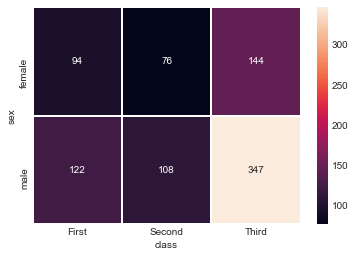

In [53]:
# titanic
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
# 인덱스 성별, 열 클래스
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
display(table.head())

sns.heatmap(table,
           annot=True, fmt='d', linewidth=1)
# annot=True 수치 나오게 한다.fmt='d' 정수지정
plt.show()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


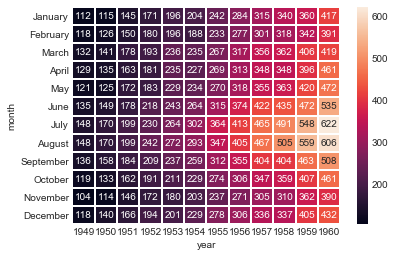

In [61]:
# flight 연도, 월별 승객수에 대한 heatmap
# x축 연도, y축 월
display(flights.head())
flights_table = flights.pivot('month','year','passengers')
display(flights_table.head())

sns.heatmap(flights_table,
           annot=True, fmt='d', linewidth=1)
plt.show()